In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


In [80]:
df = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")

In [81]:
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [82]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [83]:

df = df.replace(0,np.nan)

In [84]:
df = df.dropna(axis = 1,how = 'all')
df = df.replace(np.nan,0)
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0.0,1.0,0.0,3,2.0,0.0
1,2,38.0,71.2833,1.0,1.0,0.0,1,0.0,1.0
2,3,26.0,7.9250,1.0,0.0,0.0,3,2.0,1.0
3,4,35.0,53.1000,1.0,1.0,0.0,1,2.0,1.0
4,5,35.0,8.0500,0.0,0.0,0.0,3,2.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0.0,0.0,0.0,3,2.0,0.0
1305,1306,39.0,108.9000,1.0,0.0,0.0,1,0.0,0.0
1306,1307,38.5,7.2500,0.0,0.0,0.0,3,2.0,0.0
1307,1308,28.0,8.0500,0.0,0.0,0.0,3,2.0,0.0


In [85]:
df = df.rename(columns = {'2urvived':'Survived'})


In [86]:
df.reset_index(drop = True, inplace = True)
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0.0,1.0,0.0,3,2.0,0.0
1,2,38.0,71.2833,1.0,1.0,0.0,1,0.0,1.0
2,3,26.0,7.9250,1.0,0.0,0.0,3,2.0,1.0
3,4,35.0,53.1000,1.0,1.0,0.0,1,2.0,1.0
4,5,35.0,8.0500,0.0,0.0,0.0,3,2.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0.0,0.0,0.0,3,2.0,0.0
1305,1306,39.0,108.9000,1.0,0.0,0.0,1,0.0,0.0
1306,1307,38.5,7.2500,0.0,0.0,0.0,3,2.0,0.0
1307,1308,28.0,8.0500,0.0,0.0,0.0,3,2.0,0.0


In [87]:
dict_columns = {
    'sibsp' : 'Sib/Spo Abroad',
    'Parch' : 'Par/Chi Abroad',
    'Pclass': 'Class'
}
df.rename(columns = dict_columns, inplace = True)

dict_class = {
     3 : 'Third Class',
     2 : 'Second Class',
     1 : 'First Class'
}
df['Class'] = df['Class'].replace(dict_class)

dict_sex = {
    0 : 'Male',
    1 : 'Female'
}
df['Sex'] = df['Sex'].replace(dict_sex)

dict_station = {
    0.0 : 'Cherbourg',
    1.0 : 'QueensTown',
    2.0 : 'Southampton'
}
df['Embarked'] = df['Embarked'].replace(dict_station)

def changeDataType(num):
    return int(num)
df['Sib/Spo Abroad'] = df['Sib/Spo Abroad'].apply(changeDataType)
df['Par/Chi Abroad'] = df['Par/Chi Abroad'].apply(changeDataType)
df['Family Size'] = df['Sib/Spo Abroad'] + df['Par/Chi Abroad'] + 1
df

,Passengerid,Age,Fare,Sex,Sib/Spo Abroad,Par/Chi Abroad,Class,Embarked,Survived,Family Size
0,1,22.0,7.2500,Male,1,0,Third Class,Southampton,0.0,2
1,2,38.0,71.2833,Female,1,0,First Class,Cherbourg,1.0,2
2,3,26.0,7.9250,Female,0,0,Third Class,Southampton,1.0,1
3,4,35.0,53.1000,Female,1,0,First Class,Southampton,1.0,2
4,5,35.0,8.0500,Male,0,0,Third Class,Southampton,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,Male,0,0,Third Class,Southampton,0.0,1
1305,1306,39.0,108.9000,Female,0,0,First Class,Cherbourg,0.0,1
1306,1307,38.5,7.2500,Male,0,0,Third Class,Southampton,0.0,1
1307,1308,28.0,8.0500,Male,0,0,Third Class,Southampton,0.0,1


In [88]:
df.describe()

,Passengerid,Age,Fare,Sib/Spo Abroad,Par/Chi Abroad,Survived,Family Size
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.498854,0.385027,0.261268,1.883881
std,378.020061,12.905241,51.741500,1.041658,0.865560,0.439494,1.583639
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,1.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,1.000000
75%,982.000000,35.000000,31.275000,1.000000,0.000000,1.000000,2.000000
max,1309.000000,80.000000,512.329200,8.000000,9.000000,1.000000,11.000000


In [89]:
print(df.isnull().sum())

Passengerid       0
Age               0
Fare              0
Sex               0
Sib/Spo Abroad    0
Par/Chi Abroad    0
Class             0
Embarked          0
Survived          0
Family Size       0
dtype: int64


In [92]:
df.head()

,Passengerid,Age,Fare,Sex,Sib/Spo Abroad,Par/Chi Abroad,Class,Embarked,Survived,Family Size
0,1,22.0,7.2500,Male,1,0,Third Class,Southampton,0.0,2
1,2,38.0,71.2833,Female,1,0,First Class,Cherbourg,1.0,2
2,3,26.0,7.9250,Female,0,0,Third Class,Southampton,1.0,1
3,4,35.0,53.1000,Female,1,0,First Class,Southampton,1.0,2
4,5,35.0,8.0500,Male,0,0,Third Class,Southampton,0.0,1


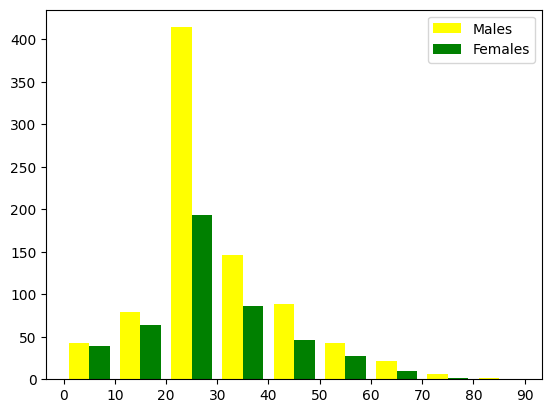

In [105]:
bins = [0,10,20,30,40,50,60,70,80,90]
plt.xticks(bins)
plt.hist([df.loc[df['Sex'] == 'Male', 'Age'],df.loc[df['Sex'] == 'Female', 'Age']], bins = bins,label = ['Males','Females'],color = ['yellow','green'])

plt.legend()
plt.show()

In [97]:
df_sex = df.groupby(df['Sex']).
df_sex